In [13]:
import sys
!{sys.executable} -m pip install -r requirements.txt
%pip install scikit-learn==1.2.1

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import joblib
import matplotlib
from sklearn import metrics

test_data = pd.read_csv("https://cmu-313.github.io/assets/project/student_data.csv")

In [15]:
test_data

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0
...,...,...,...,...,...,...,...,...,...
495,495,M,20,Computer Science,2.89,Student Government,5,0,0
496,496,F,24,Computer Science,2.53,Buggy,3,2,1
497,497,F,21,Computer Science,2.00,Sorority,3,2,0
498,498,M,22,Electrical and Computer Engineering,3.24,Men's Basketball,4,1,1


<Axes: xlabel='Gender'>

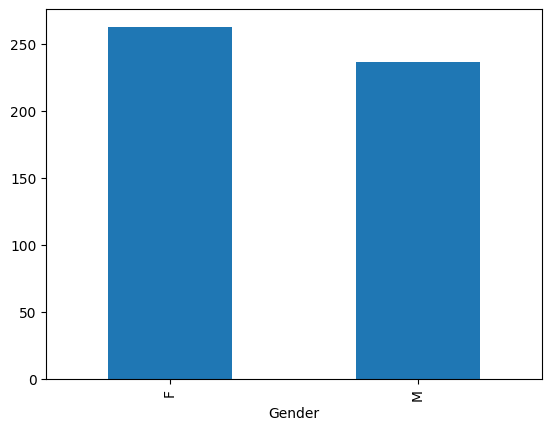

In [16]:
test_data.groupby(['Gender']).count()['Student ID'].plot(kind='bar')

<Axes: xlabel='Age'>

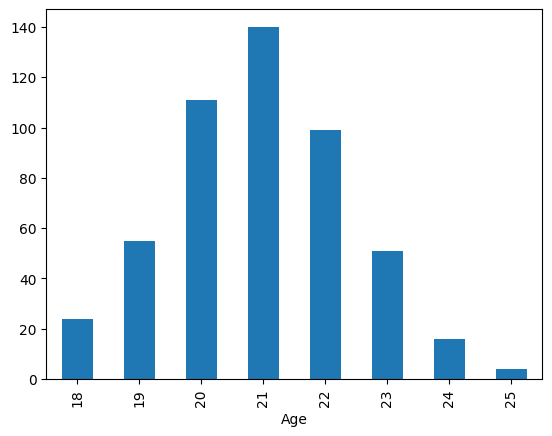

In [17]:
test_data.groupby(['Age']).count()['Student ID'].plot(kind='bar')

<Axes: xlabel='Major'>

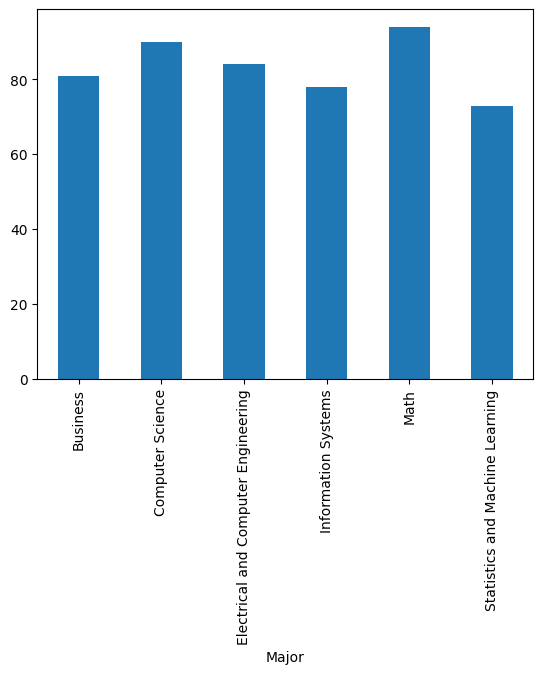

In [18]:
test_data.groupby(['Major']).count()['Student ID'].plot(kind='bar')

<Axes: >

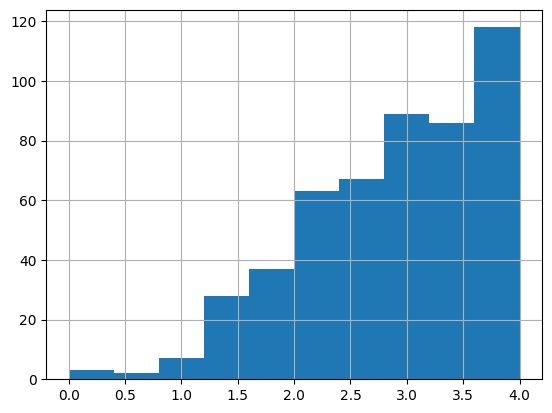

In [19]:
test_data['GPA'].hist()

<Axes: xlabel='Extra Curricular'>

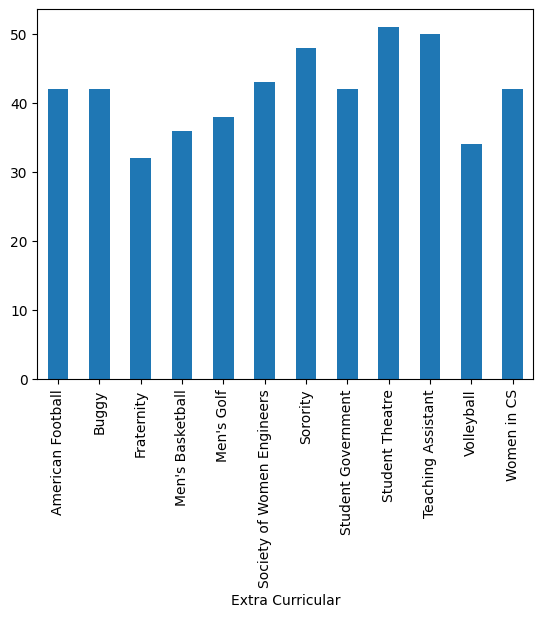

In [20]:
test_data.groupby(['Extra Curricular']).count()['Student ID'].plot(kind='bar')

<Axes: xlabel='Num Programming Languages'>

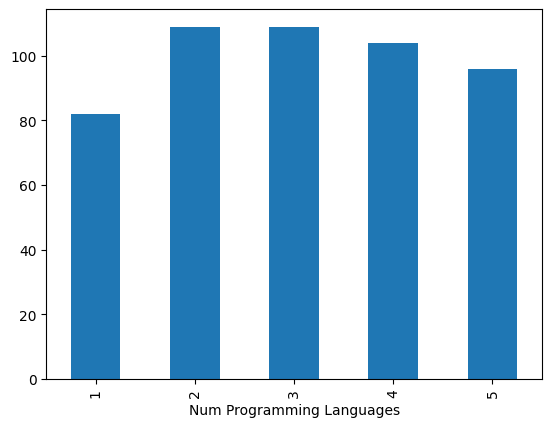

In [21]:
test_data.groupby(['Num Programming Languages']).count()['Student ID'].plot(kind='bar')

<Axes: xlabel='Num Past Internships'>

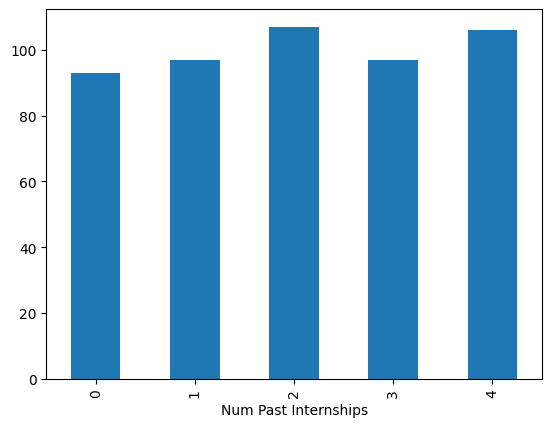

In [22]:
test_data.groupby(['Num Past Internships']).count()['Student ID'].plot(kind='bar')

In [23]:
model = joblib.load('./model.pkl')

In [24]:
features = ['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages', 'Num Past Internships']
y_pred = model.predict(test_data[features])
test_data['Prediction'] = y_pred 


In [25]:
print("Accuracy:",len(test_data[test_data['Prediction'] == test_data['Good Candidate']])/len(test_data))

Accuracy: 0.832


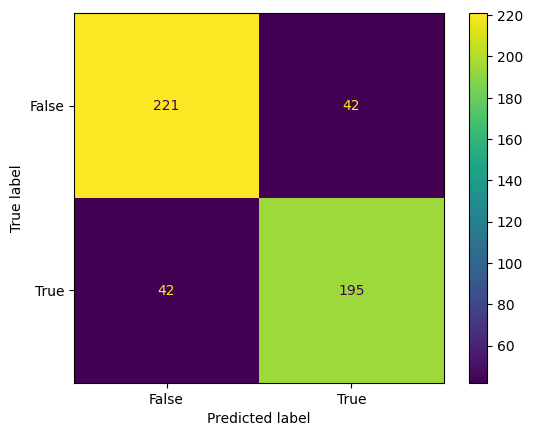

In [26]:
confusion_matrix = metrics.confusion_matrix(test_data['Good Candidate'], test_data['Prediction'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()